In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set plot style
sns.set(style="whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
try:
    X_train = pd.read_csv('../data/processed/X_train.csv')
    print("Processed training data loaded successfully!")
    print("X_train shape:", X_train.shape)
except FileNotFoundError:
    print("Error: Processed data not found. Please ensure '01_data_preprocessing.ipynb' was run successfully.")

# Display the first few rows to verify
X_train.head()

Processed training data loaded successfully!
X_train shape: (736, 22)


,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,641,-0.063147,1.560270,-1.857816,-0.627205,-0.807883,0.0,True,False,True,...,True,False,False,False,False,True,False,False,False,True
1,744,2.180526,-0.116411,-1.857816,0.087627,-0.335827,0.0,True,False,False,...,True,False,False,True,False,False,False,False,False,False
2,891,-0.063147,-0.451747,0.382627,-0.627205,1.080341,0.0,True,False,False,...,False,False,False,True,False,True,True,False,False,True
3,271,0.791586,0.442483,0.050710,0.008202,0.985930,1.0,True,False,False,...,False,False,False,False,False,True,False,True,False,True
4,655,0.257378,1.280823,-1.857816,-1.540602,-0.807883,0.0,True,False,True,...,True,False,False,False,True,False,True,False,True,False


In [3]:
# Initialize PCA to capture all components
pca = PCA(n_components=None)

# Fit PCA on the training data
pca.fit(X_train)

# Get the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

print("PCA has been fitted successfully.")
print(f"A total of {len(explained_variance_ratio)} principal components were found.")

PCA has been fitted successfully.
A total of 22 principal components were found.


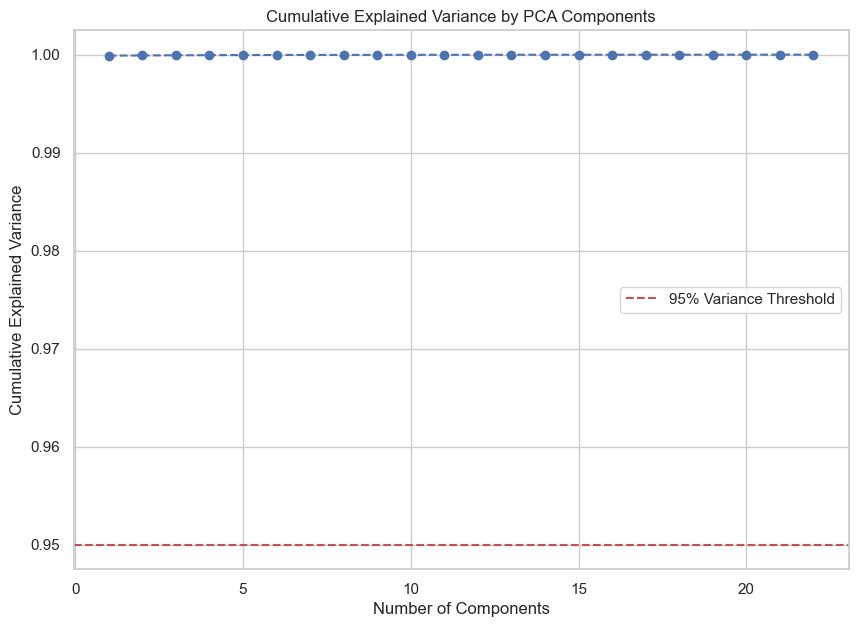

In [4]:
# Calculate the cumulative sum of explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Add a horizontal line for the 95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [5]:
# Based on the plot, we choose the optimal number of components.
N_COMPONENTS = 2

# Create the final PCA instance with the chosen number of components
pca_final = PCA(n_components=N_COMPONENTS)

# Fit and transform the training data
X_train_pca = pca_final.fit_transform(X_train)

# Load the test data and transform it using the SAME fitted PCA model
try:
    X_test = pd.read_csv('../data/processed/X_test.csv')
    X_test_pca = pca_final.transform(X_test)

    print(f"Original training data shape: {X_train.shape}")
    print(f"PCA-transformed training data shape: {X_train_pca.shape}")
    print("-" * 40)
    print(f"Original testing data shape: {X_test.shape}")
    print(f"PCA-transformed testing data shape: {X_test_pca.shape}")

except FileNotFoundError:
    print("Error: Processed X_test.csv not found.")

Original training data shape: (736, 22)
PCA-transformed training data shape: (736, 2)
----------------------------------------
Original testing data shape: (184, 22)
PCA-transformed testing data shape: (184, 2)
